**Title**

**Introduction**:
• Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
• Clearly state the question you will try to answer with your project
• Identify and describe the dataset that will be used to answer the question

**Preliminary exploratory data analysis**:
• Demonstrate that the dataset can be read from the web into R 
• Clean and wrangle your data into a tidy format
• Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
• Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

**Methods**:
• Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
• Describe at least one way that you will visualize the results
• Expected outcomes and significance:
• What do you expect to find?
• What impact could such findings have?
• What future questions could this lead to?


In [20]:
library(tidyverse)
library(tidymodels)
library(repr)

In [21]:
#read the data

data <- read_csv("cleaned_5250.csv")

#split data into training & testing
set.seed(1)
split_data <- initial_split(data, prop = 0.75, strata = planet_type)
data_train <- training(split_data) 
data_test <- testing(split_data)

Rows: 5250 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): name, planet_type, mass_wrt, radius_wrt, detection_method
dbl (8): distance, stellar_magnitude, discovery_year, mass_multiplier, radiu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
#summarize data

planet_types <- data_train |> 
    group_by(planet_type) |>
    summarize(number_of_planets = n()) |>
    mutate(percentage_of_total = round((number_of_planets/sum(number_of_planets))*100,2))
planet_types #types of planets and how many planets are categorized into each type

radius_wrt_types <- data_train |>
    group_by(radius_wrt) |>
    summarize(number_of_observations = n())
radius_wrt_types #types of radius_wrt and the number of observations for each

orbital_radius <- data_train |>
    group_by(planet_type) |>
    summarize(orbital_min = min(orbital_radius, na.rm = TRUE),
             orbital_max = max(orbital_radius, na.rm = TRUE))
orbital_radius

planet_type,number_of_planets,percentage_of_total
<chr>,<int>,<dbl>
Gas Giant,1226,31.15
Neptune-like,1362,34.60
Super Earth,1194,30.34
Terrestrial,150,3.81
Unknown,4,0.10


radius_wrt,number_of_observations
<chr>,<int>
Earth,1455
Jupiter,2469
NA,12


planet_type,orbital_min,orbital_max
<chr>,<dbl>,<dbl>
Gas Giant,0.00440,2880.00
Neptune-like,0.00900,4.27
Super Earth,0.00622,10.26
Terrestrial,0.00580,1.26
Unknown,14.70000,18.60


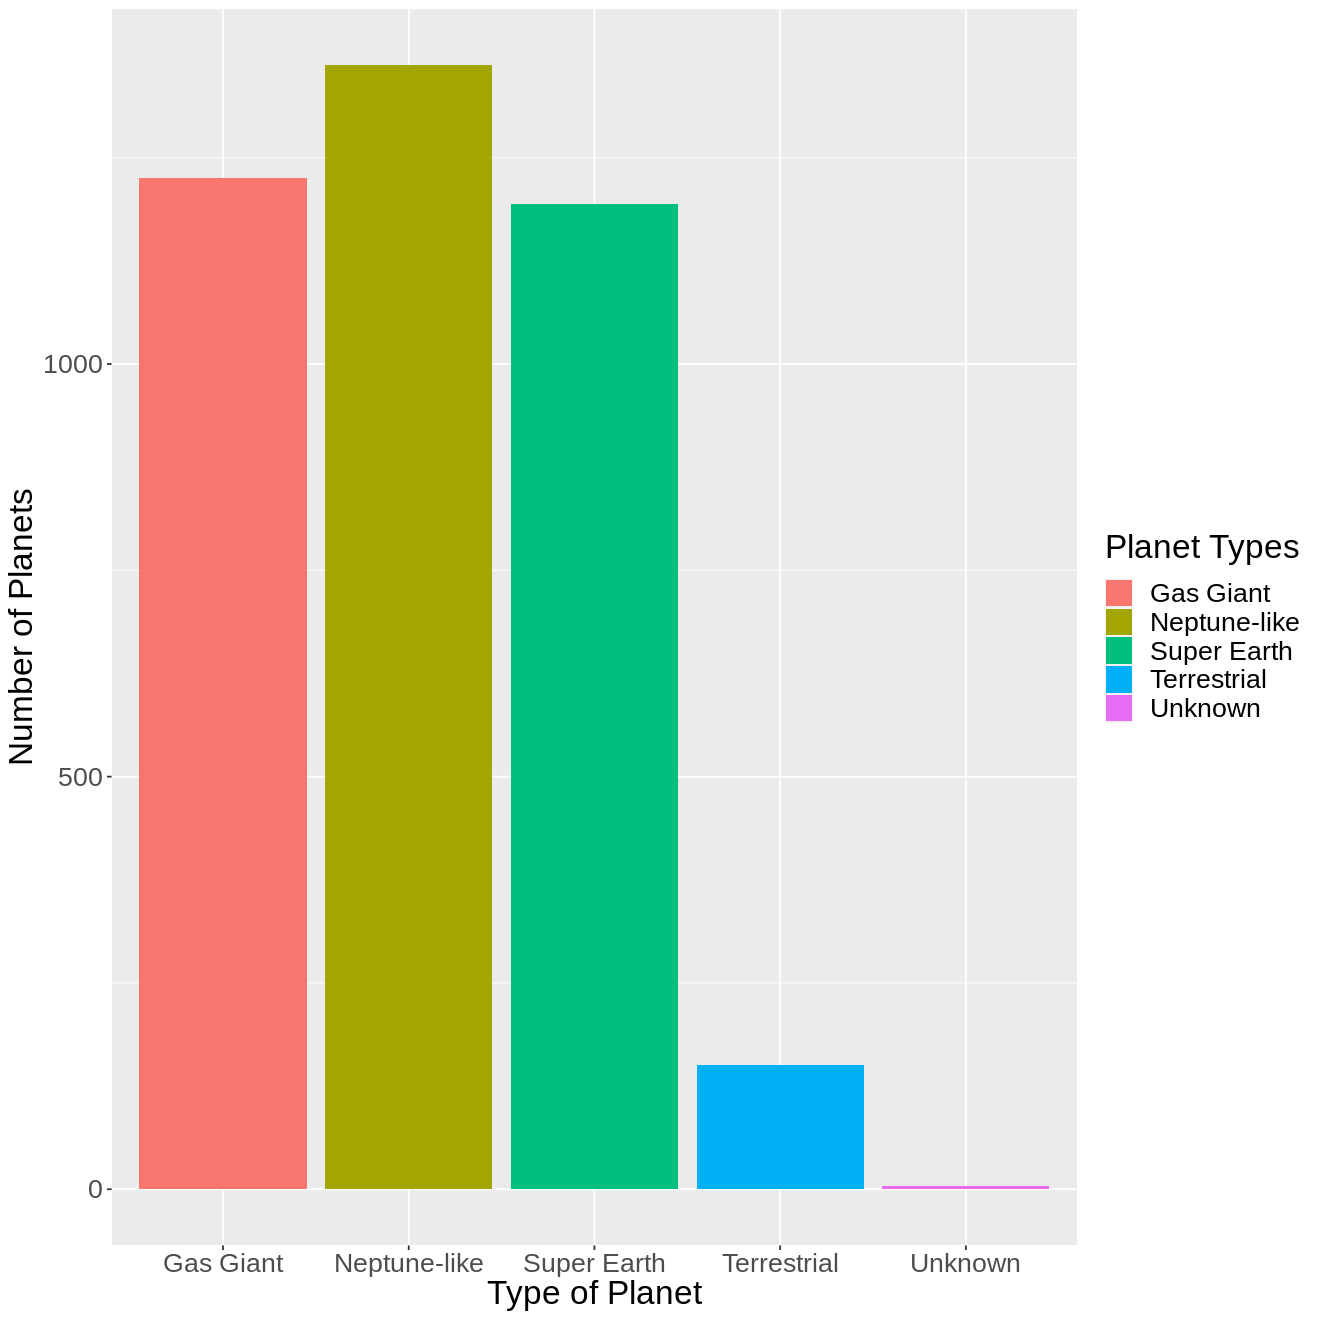

In [25]:
#data visualization 
options(repr.plot.width = 11, repr.plot.height = 11)

planet_type_dist <- planet_types |>
    select(-percentage_of_total) |>
    ggplot(aes(x = planet_type, y = number_of_planets, fill = planet_type)) +
    geom_bar(stat = "identity") +
    labs(x = "Type of Planet", y = "Number of Planets", fill = "Planet Types") +
    theme(text = element_text(size = 20))
planet_type_dist #distribution of planet types

Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 210 rows containing missing values (geom_point).”


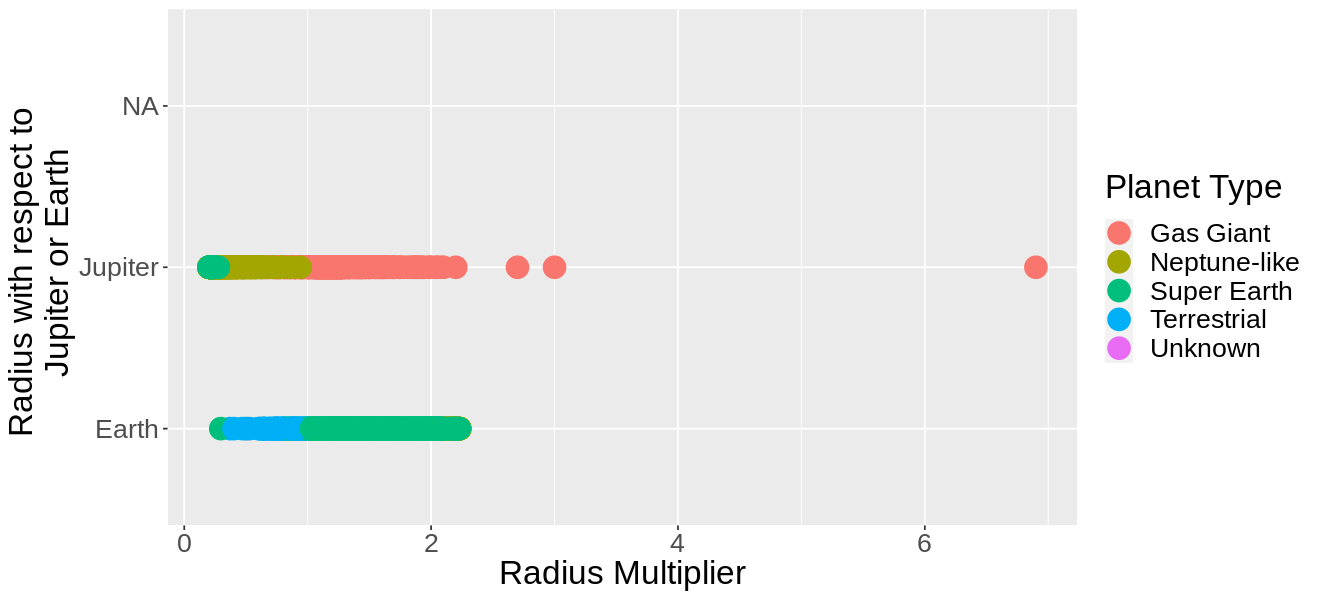

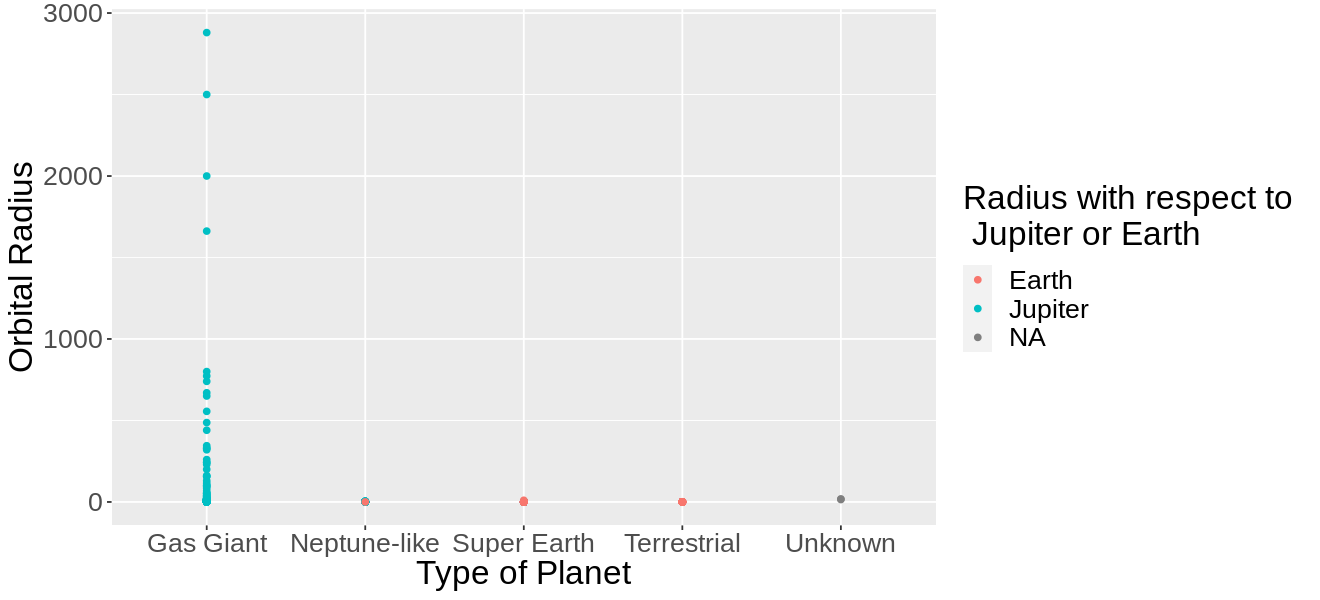

In [27]:
#data visualization 
options(repr.plot.width = 11, repr.plot.height = 5)

planet_dist <- data_train |>
    select(planet_type, radius_multiplier, radius_wrt) |>
    ggplot(aes(x = radius_multiplier, y = radius_wrt, color = planet_type)) +
    geom_point(size = 6) +
    labs(x = "Radius Multiplier", y = "Radius with respect to \n Jupiter or Earth", color = "Planet Type") +
    theme(text = element_text(size = 20))
planet_dist #how radius multiplier and radius wrt influences planet type

orbital_planet <- data_train |>
    select(planet_type, orbital_radius, radius_wrt) |>
    ggplot(aes(x = planet_type, y = orbital_radius, color = radius_wrt)) +
    geom_point() +
    labs(x = "Type of Planet", y = "Orbital Radius", color = "Radius with respect to \n Jupiter or Earth") +
    theme(text = element_text(size = 20))
orbital_planet